## Create training datasets for decoder

2025-08-16 10:47:25.046813: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-16 10:47:25.069502: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-16 10:47:25.069522: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-16 10:47:25.069550: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-16 10:47:25.074813: I tensorflow/core/platform/cpu_feature_g

Sesison path: ../Data/t18/t18.2025.01.21/Typing
tfdata path: ../Data/t18/t18.2025.01.21/Typing


mat_to_tfrecord_V3.py input parameters:
	Session mat path: ../Data/t18/t18.2025.01.21/Typing
	Block numbers: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
	Number of test trials: 110
	Trials to remove: {}
	Channels to exclude: []
	Channels to zero: []
	Include threshold crossings: True
	Include spike power: True
	Spike power max: 50000
	Z-score data: True
	Global std: True
	Bin compression factor: 2
	Save path: ../Data/t18/t18.2025.01.21/Typing/tfdata_20ms


RedisMat file for block 1: ../Data/t18/t18.2025.01.21/Typing/RedisMat/20250121_124539_(1).mat
RedisMat file for block 2: ../Data/t18/t18.2025.01.21/Typing/RedisMat/20250121_130418_(2).mat
RedisMat file for block 3: ../Data/t18/t18.2025.01.21/Typing/RedisMat/20250121_133244_(3).mat
RedisMat file for block 4: ../Data/t18/t18.2025.01.21/Typing/RedisMat/20250121_135902_(4).mat
RedisMat file for block 5: ../Data/t18/t18.2025.01.21/Typing/RedisMat/2025

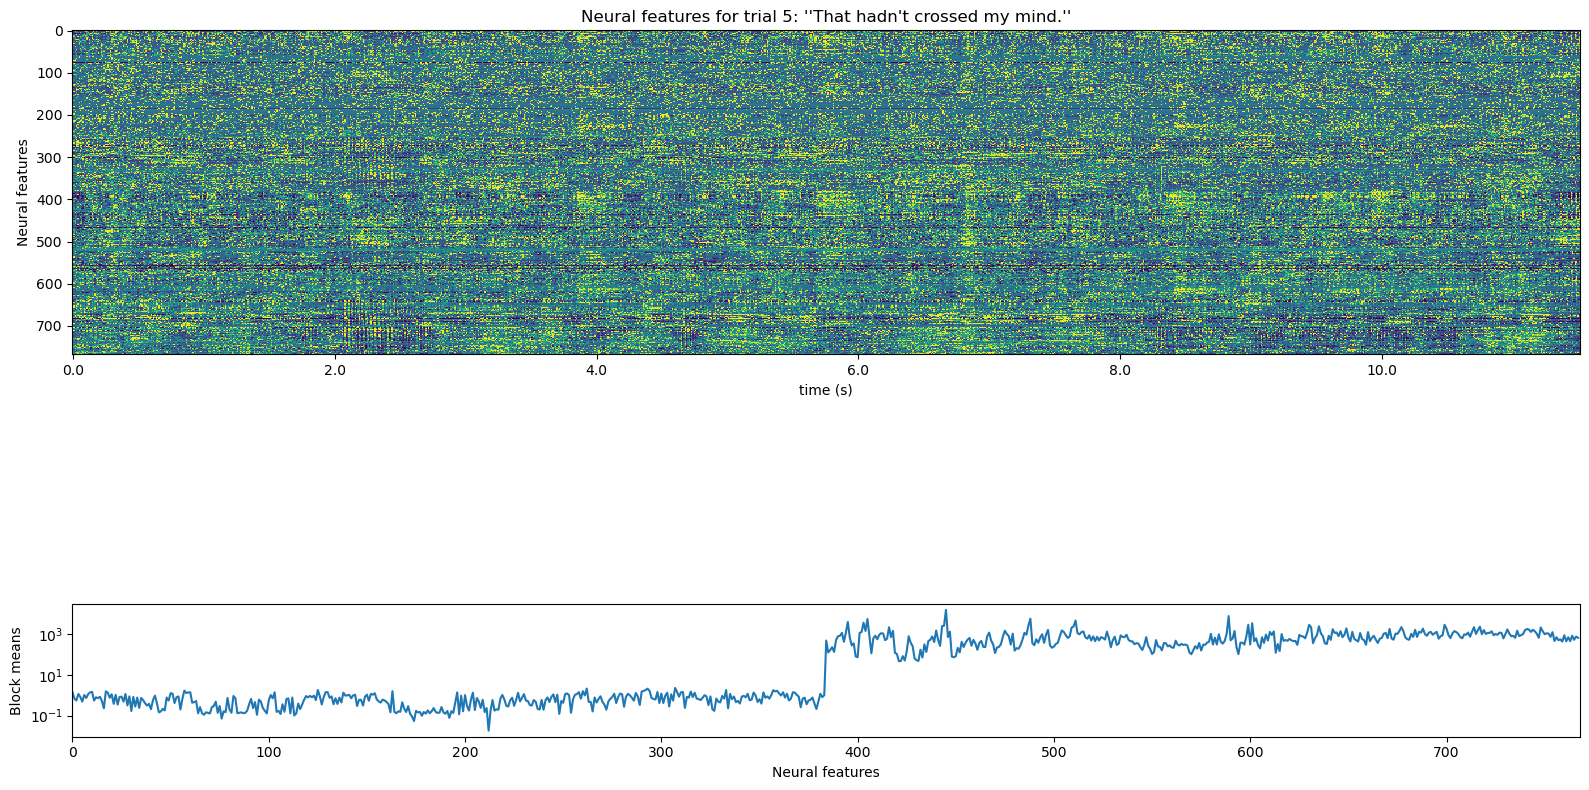

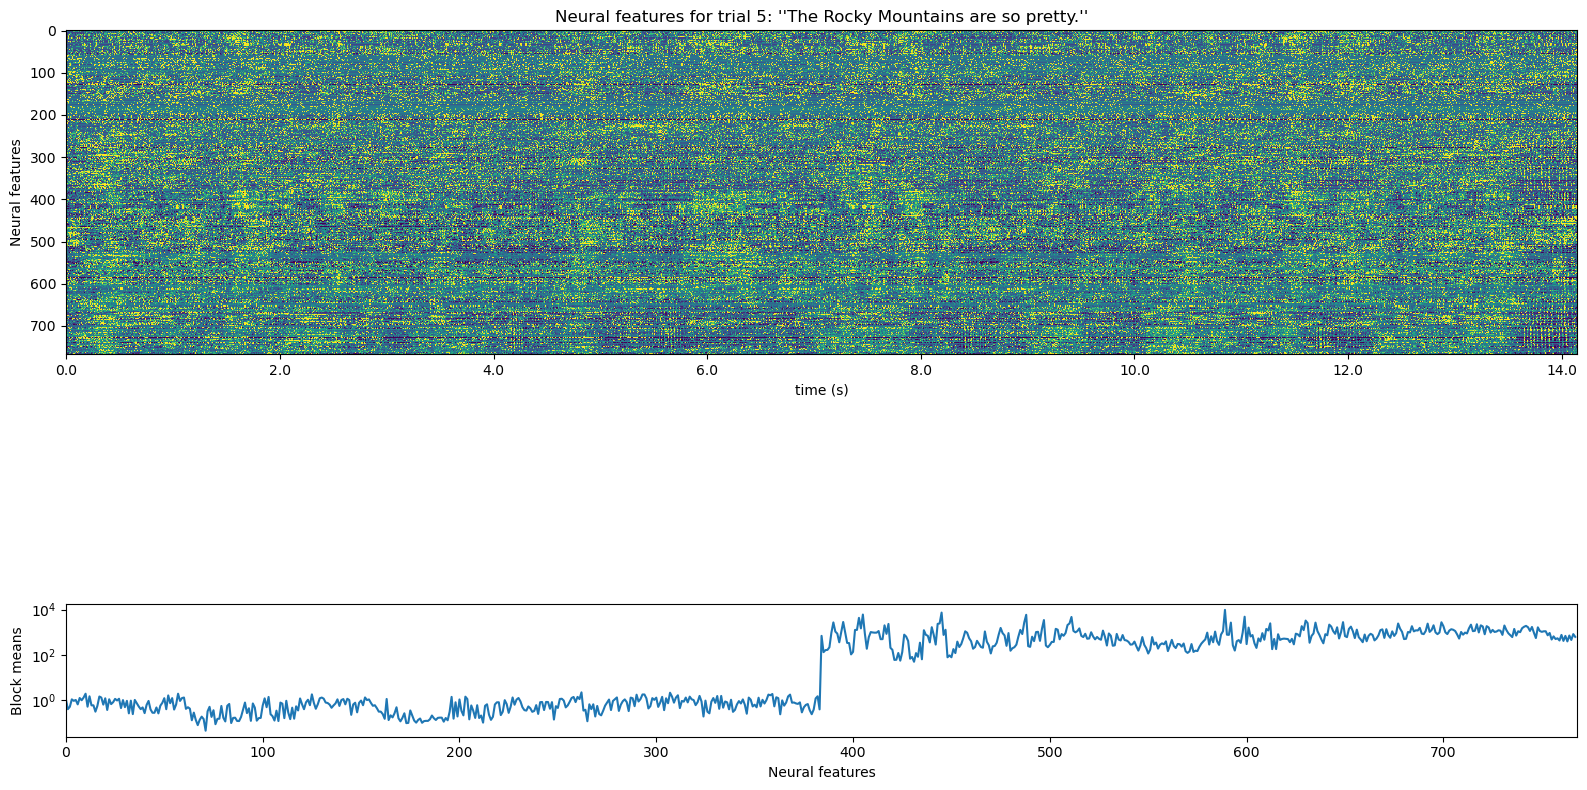

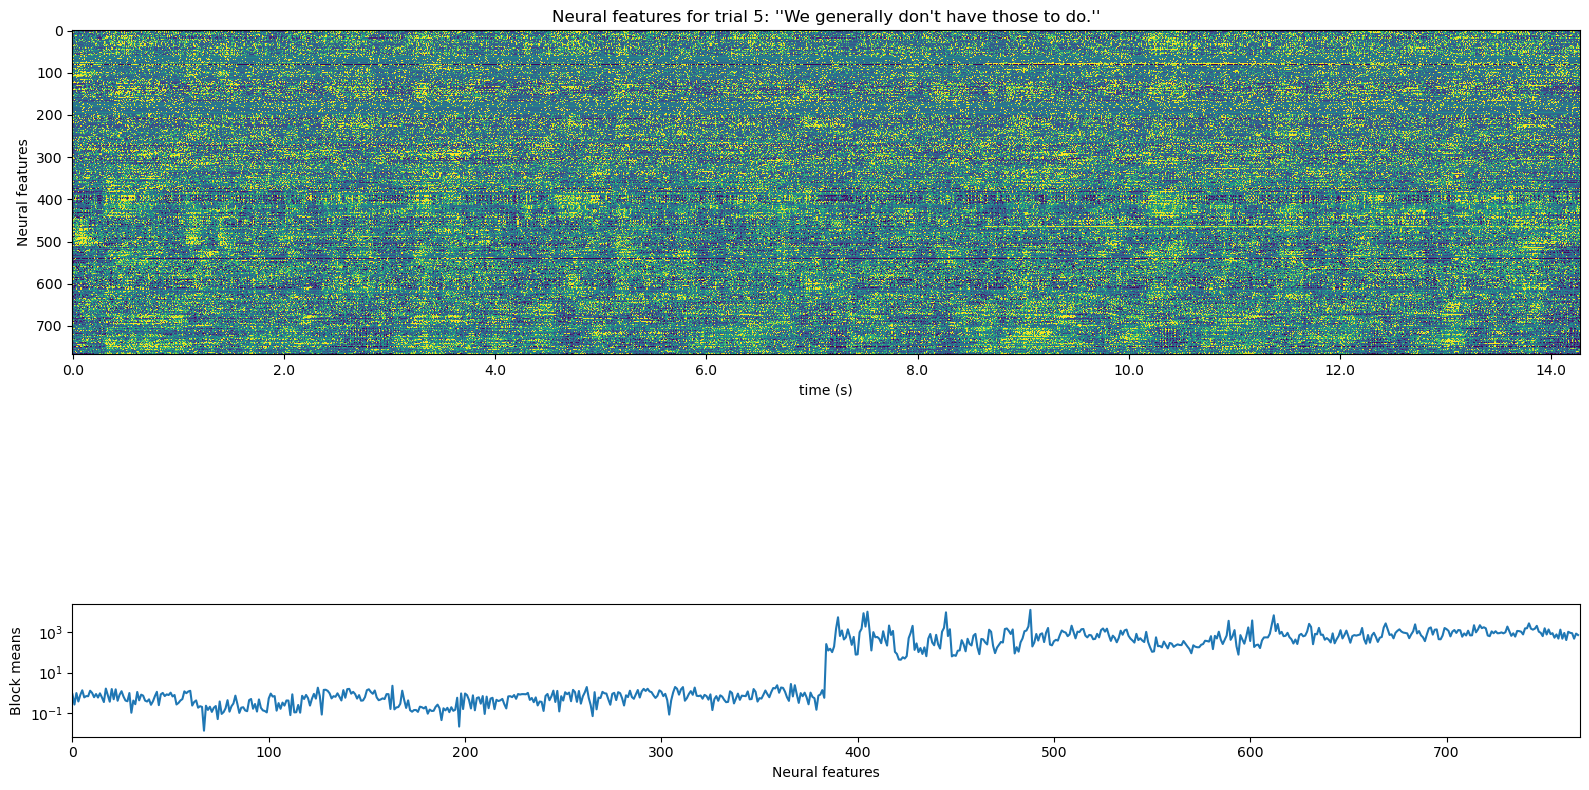

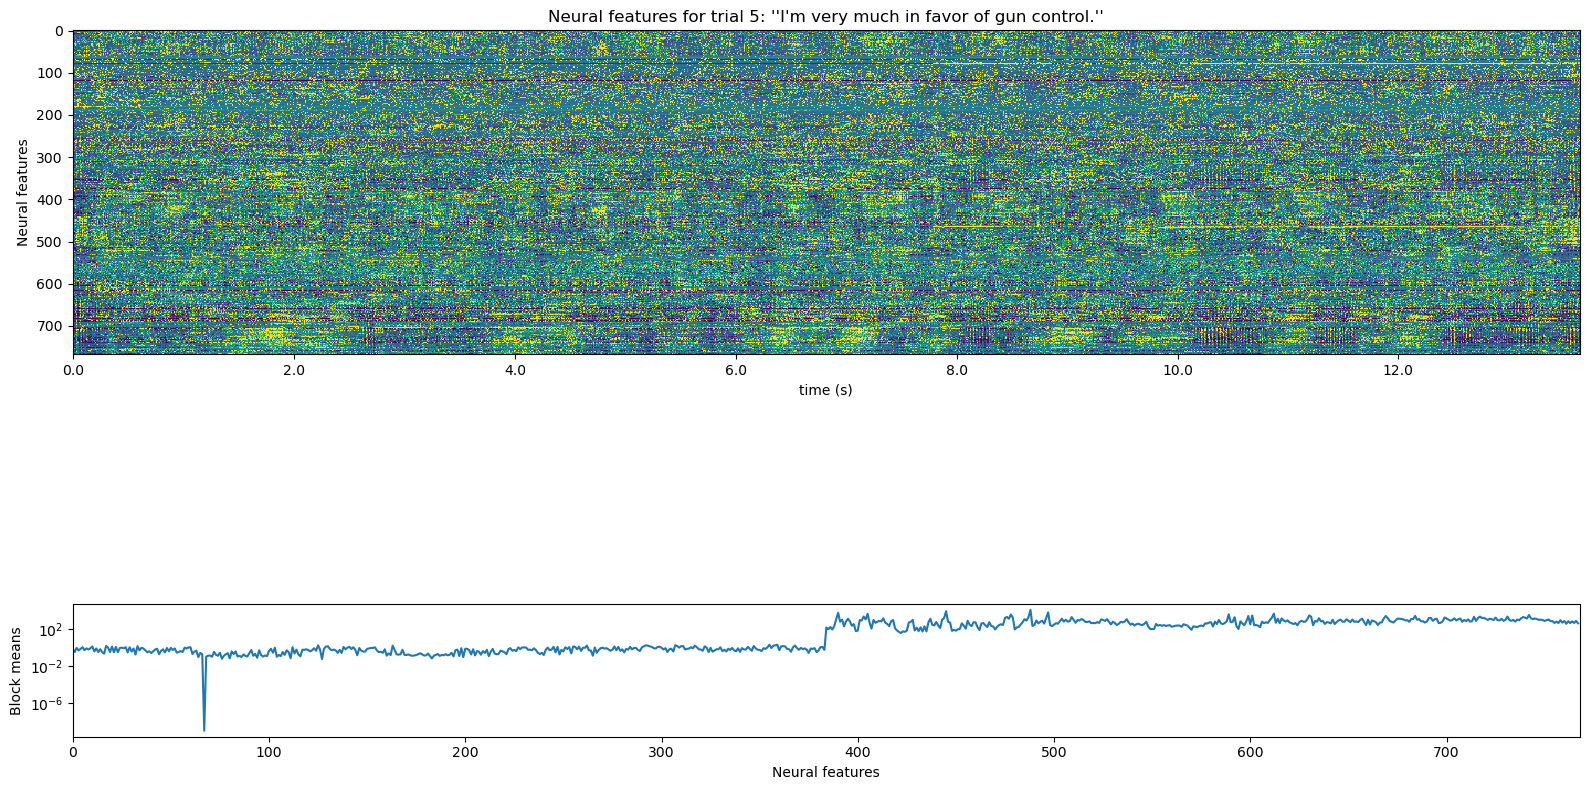

In [1]:
import sys
sys.path.append('../utils')
import mat_to_tfrecord
from pathlib import Path
import numpy as np
from T18_SessionArgs import get_session_info

sessions = [
    't18.2025.01.21',
    't18.2025.01.22',
    't18.2025.02.04',
    't18.2025.02.05',
     ]

participant = 't18'
bin_compression_factor = 2
channels_to_exclude = list(range(0,0)) #+  list(range(192,256))#list(range(256, 384)) if ignoring hand-knob arrays
channels_to_zero = list(range(0,0)) #[] # leave empty to not zero anything

for session in sessions:
    trials_to_remove, block_nums, num_test_trials = get_session_info(session)
    session_path = str(Path('../Data', participant, session, 'Typing'))
    tfdata_path = str(Path(session_path, 'tfdata_20ms'))

    print(f'Sesison path: {session_path}')
    print(f'tfdata path: {session_path}')
    print('\n')

    args = {
        'session_mat_path': session_path,
        'block_nums': block_nums,
        'num_test_trials': num_test_trials,
        'trials_to_remove': trials_to_remove,
        'channels_to_exclude': channels_to_exclude,
        'channels_to_zero': channels_to_zero,
        'include_thresh_crossings': True,
        'include_spike_power': True,
        'spike_pow_max': 50000,
        'z_score_data': True,
        'global_std': True,
        'bin_compression_factor': bin_compression_factor,
        'save_path': tfdata_path,
    }

    mat_to_tfrecord.main(args)

## Train the decoder. Remember to Restart the notebook first!

In [1]:
from omegaconf import OmegaConf
import sys
sys.path.append('../')
from utils.brainToText_trainDecoder import brainToText_decoder

args = OmegaConf.load('T18_trainArgs.yaml')

decoder = brainToText_decoder(args)

infOut, stats = decoder.train()

2025-08-16 10:34:17.732601: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-16 10:34:17.754190: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-16 10:34:17.754207: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-16 10:34:17.754230: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-16 10:34:17.758898: I tensorflow/core/platform/cpu_feature_g

2025-08-16 10:34:18,715: Using GPU #: 0


2025-08-16 10:34:18.758559: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-16 10:34:18.799722: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-16 10:34:18.799874: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 multiple                  18484224  
                                                                 
 gru_2 (GRU)                 multiple                  1575936   
                                                                 
 gru_3 (GRU)                 multiple                  1575936   
                                                                 
 gru_4 (GRU)                 multiple                  1575936   
                                                                 
 gru_5 (GRU)                 multiple                  1575936   
                                                                 
 dense (Dense)               multiple                  15903     
                                                                 
Total params: 24804383 (94.62 MB)
Trainable params: 24804383 (9

2025-08-16 10:34:25.298716: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2025-08-16 10:34:25.613695: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x75bb60112700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-16 10:34:25.613721: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-08-16 10:34:25.620339: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-08-16 10:34:25.675728: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2025-08-16 10:34:26,114: Train batch 0: loss: 662.50 gradNorm: 224.18 
2025-08-16 10:34:26,195: Val batch: CER (t18.2025.01.21): 0.935
2025-08-16 10:34:26,251: Val batch: CER (t18.2025.01.22): 0.888
2025-08-16 10:34:26,298: Val batch: CER (t18.2025.02.04): 0.883
2025-08-16 10:34:26,341: Val batch: CER (t18.2025.02.05): 0.880
2025-08-16 10:34:26,342: Val batch 0: CER (avg): 0.896 
2025-08-16 10:34:26,796: Model checkpoint saved to: latencyModel/
2025-08-16 10:34:26,798: Saved training args.yaml to: latencyModel/
2025-08-16 10:34:26,798: Batches since validation CER improved: 0
2025-08-16 10:34:26,983: Train batch 1: loss: 655.03 gradNorm: 278.03 
2025-08-16 10:34:27,533: Train batch 2: loss: 487.75 gradNorm: 249.51 
2025-08-16 10:34:27,766: Train batch 3: loss: 629.36 gradNorm: 428.90 
2025-08-16 10:34:28,350: Train batch 4: loss: 367.86 gradNorm: 281.91 
2025-08-16 10:34:28,993: Train batch 5: loss: 471.95 gradNorm: 497.71 
2025-08-16 10:34:29,203: Train batch 6: loss: 400.95 gradNorm:

In [1]:
from omegaconf import OmegaConf
import sys
sys.path.append('../')
from utils.brainToText_trainDecoder import brainToText_decoder

args = OmegaConf.load('T18_trainArgs.yaml')

decoder = brainToText_decoder(args)
out, out_by_day = decoder.inference()

2025-08-16 16:49:55.222236: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-16 16:49:55.244300: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-16 16:49:55.244317: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-16 16:49:55.244342: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-16 16:49:55.249224: I tensorflow/core/platform/cpu_feature_g

2025-08-16 16:49:56,268: Using GPU #: 0


2025-08-16 16:49:56.274655: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-16 16:49:56.317019: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-16 16:49:56.317163: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 multiple                  18484224  
                                                                 
 gru_2 (GRU)                 multiple                  1575936   
                                                                 
 gru_3 (GRU)                 multiple                  1575936   
                                                                 
 gru_4 (GRU)                 multiple                  1575936   
                                                                 
 gru_5 (GRU)                 multiple                  1575936   
                                                                 
 dense (Dense)               multiple                  15903     
                                                                 
Total params: 24804383 (94.62 MB)
Trainable params: 24804383 (9

2025-08-16 16:49:58.683044: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600


2025-08-16 16:49:58,934: Val batch: CER (t18.2025.01.21): 0.003
2025-08-16 16:49:59,253: Val batch: CER (t18.2025.01.22): 0.002
2025-08-16 16:49:59,511: Val batch: CER (t18.2025.02.04): 0.002
2025-08-16 16:49:59,788: Val batch: CER (t18.2025.02.05): 0.002


In [2]:
import pickle
import numpy as np
initial_window = 15 * 20
slide_size = 6 * 20
latencies = {}
CHAR_DEF = [
    '>', ',', '?', '.',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 
    'H', 'I', 'J', 'K', 'L', 'M', 'N', 
    'O', 'P', 'Q', 'R', 'S', 'T', 'U', 
    'V', 'W', 'X', 'Y', 'Z']
for sentence in out['logits']:
    decoded_classes = np.argmax(sentence,-1)
    i = 0
    while decoded_classes[i] == 30:
        i+=1
    first_letter = CHAR_DEF[decoded_classes[i]]
    latency = initial_window + slide_size * (i-1)
    if first_letter not in latencies:      
        latencies[first_letter] = [latency]
    else:
        latencies[first_letter].append(latency)

with open('t18_latencies.pkl', 'wb') as f:
    pickle.dump(latencies, f)